In [6]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import Patch


import sys
sys.path.append('../../')

from draw_figures import plot_rmse_boxplots

plt.style.use('/home/zhangtianyi/Gibss-Gaussian-Filtering/style.mpl')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
import json

In [9]:
def read_npz_files_in_s_folders(directory):
    data_files = {}
    for item in os.scandir(directory):
        if item.is_dir() and item.name.endswith(''):
            npz_path = os.path.join(item.path, 'data.npz')
            if os.path.exists(npz_path):
                data = np.load(npz_path)
                data_files[item.name] = data
    
    return data_files

# Example usage
data_files = read_npz_files_in_s_folders('/home/zhangtianyi/Gibss-Gaussian-Filtering/results/air_traffic_m')
print(data_files.keys())


dict_keys(['GGF4e-4', 'GGF8e-4', 'GGF6e-4', 'UKF', 'GGF2e-4', 'GGF1e-3', 'GGF1e-4', 'GGF', 'EKF'])


In [10]:
armse_ekf = np.mean(np.sqrt(np.mean((data_files['EKF']['x_mc'] - 
                                             data_files['EKF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ukf = np.mean(np.sqrt(np.mean((data_files['UKF']['x_mc'] - 
                                             data_files['UKF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf = np.mean(np.sqrt(np.mean((data_files['GGF']['x_mc'] - 
                                             data_files['GGF']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf_1e_4 = np.mean(np.sqrt(np.mean((data_files['GGF1e-4']['x_mc'] - 
                                             data_files['GGF1e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf_2e_4 = np.mean(np.sqrt(np.mean((data_files['GGF2e-4']['x_mc'] - 
                                             data_files['GGF2e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf_4e_4 = np.mean(np.sqrt(np.mean((data_files['GGF4e-4']['x_mc'] - 
                                             data_files['GGF4e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf_6e_4 = np.mean(np.sqrt(np.mean((data_files['GGF6e-4']['x_mc'] - 
                                             data_files['GGF6e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf_8e_4 = np.mean(np.sqrt(np.mean((data_files['GGF8e-4']['x_mc'] - 
                                             data_files['GGF8e-4']['x_hat_mc'])**2, axis=(1))), axis=1)
armse_ggf_1e_3 = np.mean(np.sqrt(np.mean((data_files['GGF1e-3']['x_mc'] - 
                                             data_files['GGF1e-3']['x_hat_mc'])**2, axis=(1))), axis=1)
# armse_values = {
#     'armse_kf': armse_kf,
#     'armse_ggf': armse_ggf,
#     'armse_ggf_1e_4': armse_ggf_1e_4,
#     'armse_ggf_2e_4': armse_ggf_2e_4,
#     'armse_ggf_4e_4': armse_ggf_4e_4,
#     'armse_ggf_6e_4': armse_ggf_6e_4,
#     'armse_ggf_8e_4': armse_ggf_8e_4,
#     'armse_ggf_1e_3': armse_ggf_1e_3,
# }

armse_values = [
    armse_ekf,
    armse_ukf,
    armse_ggf,
    armse_ggf_1e_4,
    armse_ggf_2e_4,
    armse_ggf_4e_4,
    armse_ggf_6e_4,
    armse_ggf_8e_4,
    armse_ggf_1e_3,
]
# print(armse_values.keys())
# print(armse_values.items())

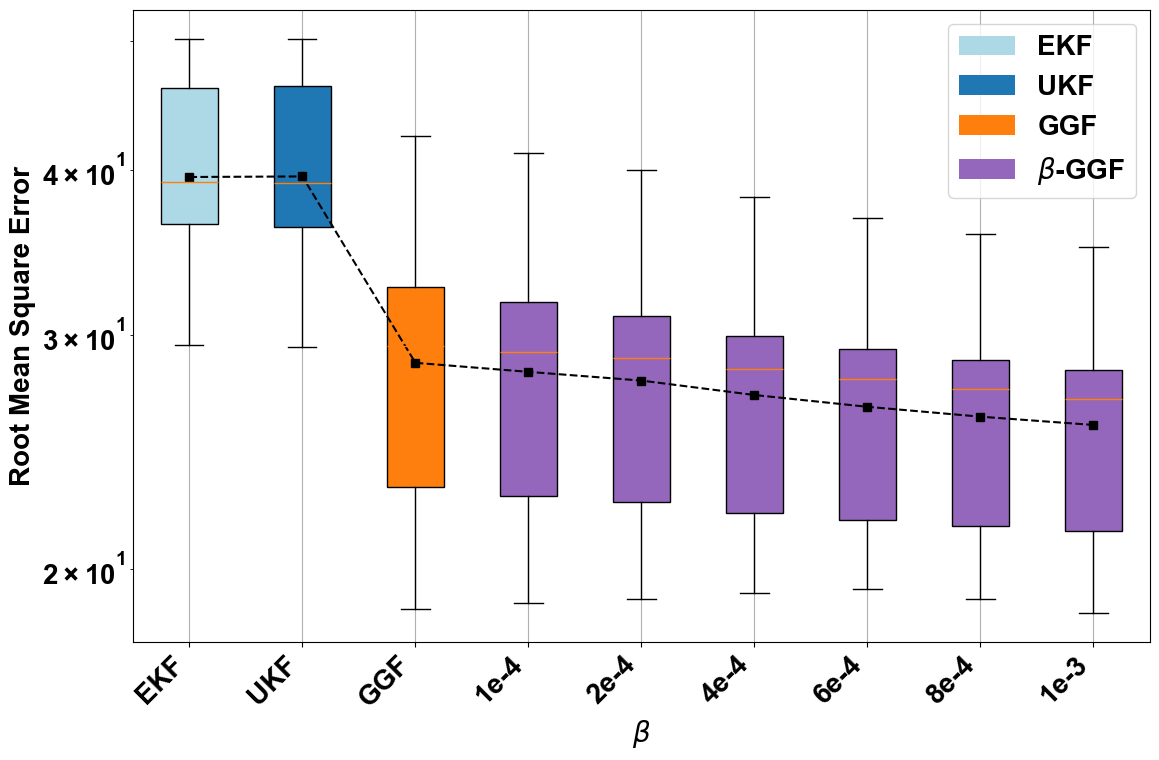

In [11]:
from matplotlib.patches import Patch
xlab1 = r'$\beta$'
variable_names = ['EKF', 'UKF', 'GGF', '1e-4', '2e-4', '4e-4', '6e-4', '8e-4', '1e-3']
label = ['EKF', 'UKF', 'GGF', r'$\beta$'+'-GGF']
plt.figure(figsize=(12, 8))
plt.yscale('log')
box = plt.boxplot(armse_values, vert=True, patch_artist=True, showfliers=False)  # 'patch_artist=True' fills the box with color
colors = ['lightblue']+['C0']+['C1']+['C4']*6
for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
means = [np.mean(datapoint) for datapoint in armse_values]
plt.plot(range(1, len(armse_values) + 1), means, marker='s', linestyle='--', color='black', label='Mean')
plt.xticks(ticks=range(1, len(armse_values) + 1), labels=variable_names, rotation=45, ha='right')
plt.xlabel(xlab1) 
plt.ylabel('Root Mean Square Error')
# plt.ylim(ylims[i])
plt.grid(True)
legend_elements = [Patch(facecolor=colors[0], label=label[0]),
                    Patch(facecolor=colors[1], label=label[1]),
                    Patch(facecolor=colors[2], label=label[2]),
                    Patch(facecolor=colors[3], label=label[3])]
plt.legend(handles=legend_elements)
# plt.show()
plt.tight_layout()
plt.savefig('/home/zhangtianyi/Gibss-Gaussian-Filtering/figures/air_traffic_m.png', bbox_inches='tight')

Boxplot of ARMSE Values with Suffix _s
Boxplot of ARMSE Values with Suffix _m
Boxplot of ARMSE Values with Suffix _a


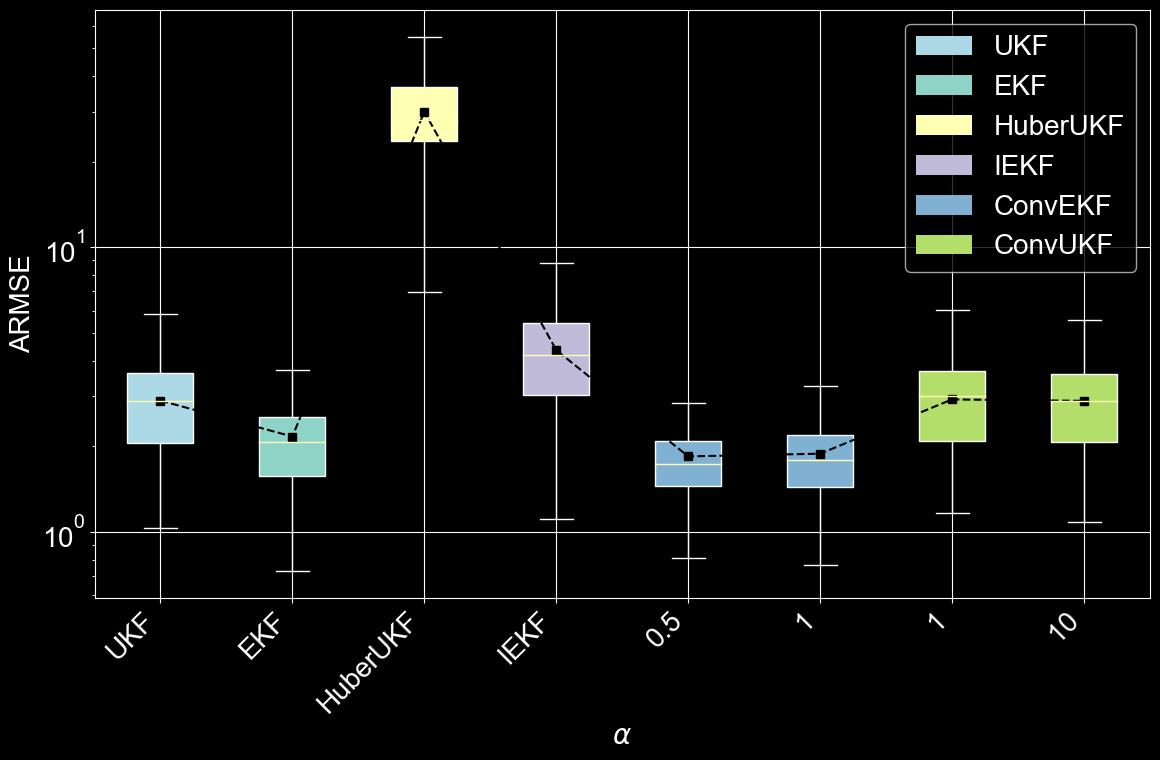

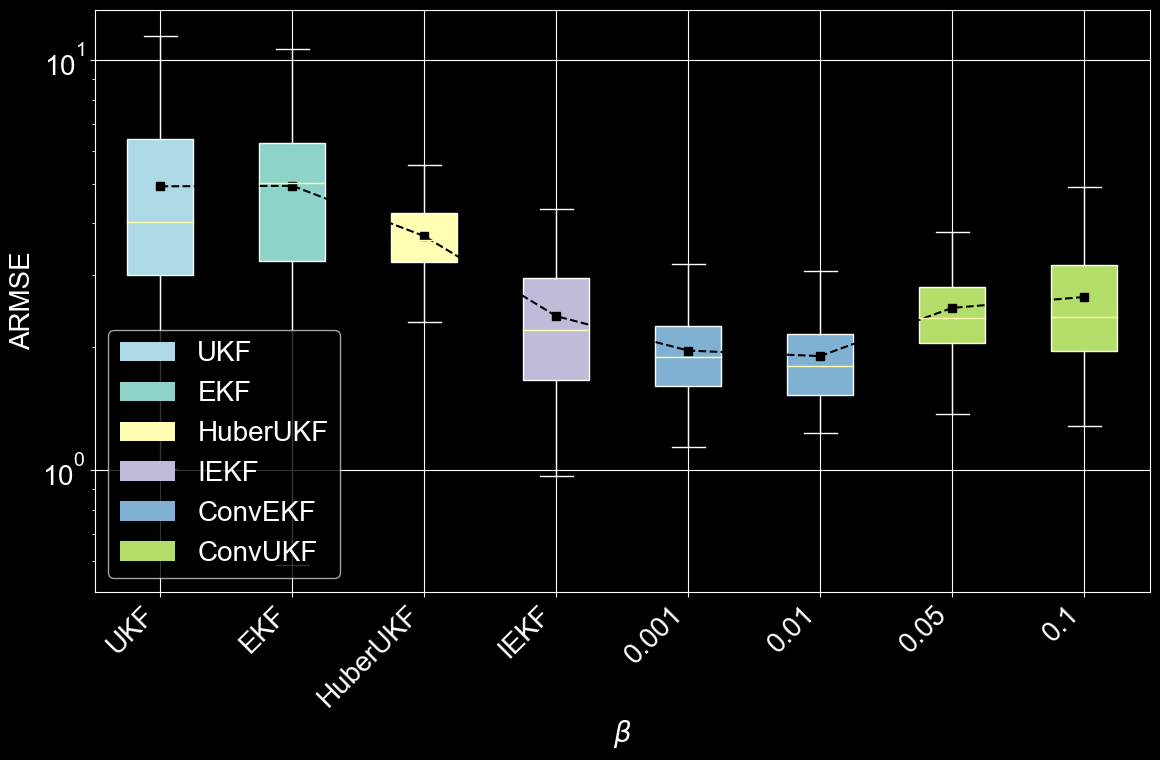

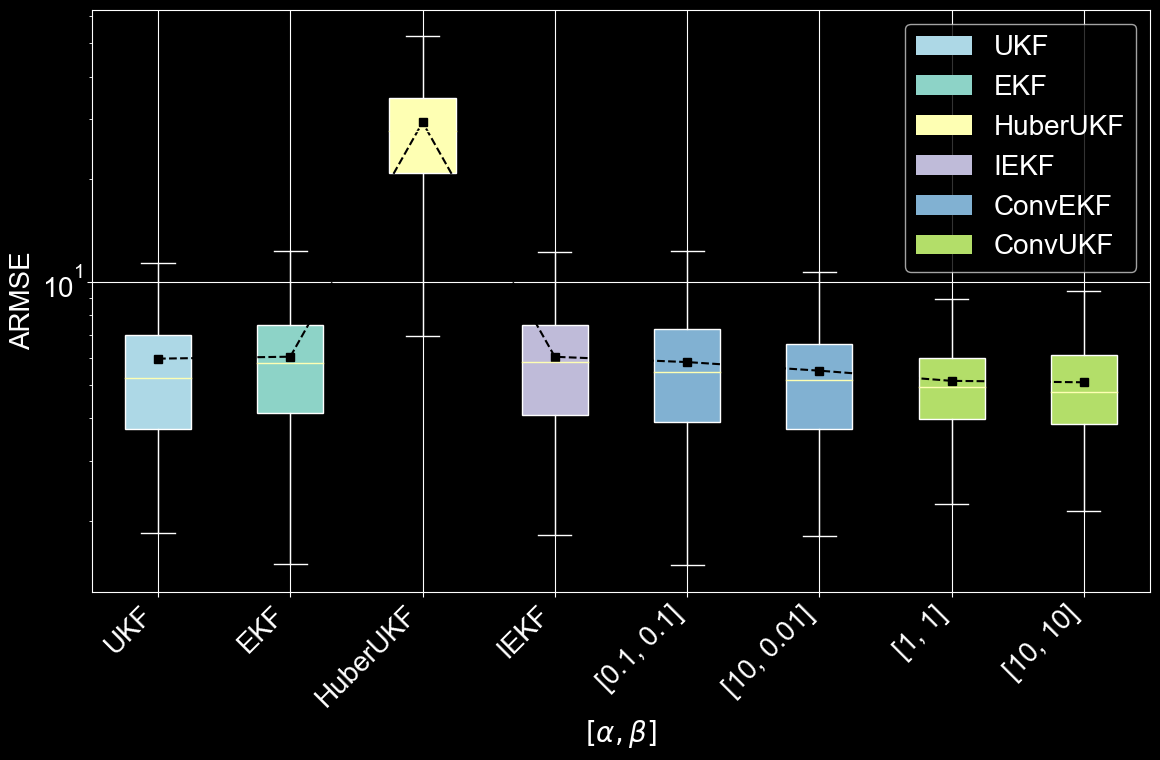

In [7]:
# Separate the ARMSE values by suffixes
# suffixes = set(key.split('_')[-1] for key in armse_values.keys())
suffixes = ['s', 'm', 'a']
data_by_suffix = {suffix: [] for suffix in suffixes}
xlab1 = [r'$\alpha$', r'$\beta$', r'$[\alpha, \beta]$']
variable_names = [['UKF', 'EKF','HuberUKF','IEKF','0.5', '1', '1', '10'],
                    ['UKF', 'EKF','HuberUKF','IEKF','0.001', '0.01', '0.05', '0.1'],
                    ['UKF', 'EKF','HuberUKF','IEKF', '[0.1, 0.1]', '[10, 0.01]', '[1, 1]', '[10, 10]']]
ylims = [[0, 13], [0, 12], [0, 23]]
i=0
for key, value in armse_values.items():
    # print('key', key)
    suffix = key.split('_')[-1]
    data_by_suffix[suffix].append(value)
x_name = ['KF', '0.1']
# Plot and save boxplots for each suffix
for suffix, data in data_by_suffix.items():
    plt.figure(figsize=(12, 8))
    plt.yscale('log')
    # Adding color to the boxplots
    box = plt.boxplot(data, vert=True, patch_artist=True, showfliers=False)  # 'patch_artist=True' fills the box with color

    # Choosing colors
    colors = ['lightblue']+['C0']+['C1']+['C2'] + ['C4']*2+['C6']*2
    label = ['UKF', 'EKF','HuberUKF','IEKF','ConvEKF','ConvUKF']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # plt.title(f'Boxplot of ARMSE Values with Suffix _{suffix}')
    print(f'Boxplot of ARMSE Values with Suffix _{suffix}')
    # Calculating the mean of each boxplot
    means = [np.mean(datapoint) for datapoint in data]

    # Adding a line connecting the means of each boxplot
    plt.plot(range(1, len(data) + 1), means, marker='s', linestyle='--', color='black', label='Mean')
        
    # variable_names = [key for key in armse_values.keys() if key.endswith(suffix)]
    # variable_names = ['KF', '0.01', '0.03', '0.06', '0.1']
    plt.xticks(ticks=range(1, len(data) + 1), labels=variable_names[i], rotation=45, ha='right')
    plt.xlabel(xlab1[i]) 
    plt.ylabel('ARMSE')
    # plt.ylim(ylims[i])
    plt.grid(True)
    # Creating a custom legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=colors[0], label=label[0]),
                       Patch(facecolor=colors[1], label=label[1]),
                       Patch(facecolor=colors[2], label=label[2]),
                       Patch(facecolor=colors[3], label=label[3]),
                       Patch(facecolor=colors[4], label=label[4]),
                       Patch(facecolor=colors[6], label=label[5])]
    plt.legend(handles=legend_elements)
    # Saving the plot
    # plt.show()
    plt.tight_layout()
    plt.savefig(f'sincos_{suffix}.pdf', bbox_inches='tight')
    # plt.close()  # Close the figure to avoid displaying it inline
    
    i+=1
# Return the file paths of the saved plots
# file_paths = [f'/mnt/data/armse_values_{suffix}.png' for suffix in suffixes]
# file_paths

In [16]:
import os
import numpy as np


def list_files(directory):
    result_path = os.path.join(directory, '0.05')
    enks_rmse = voe_rmse = gvoe2_rmse = gvoe_rmse = None
    for root, dirs, files in os.walk(result_path):
        for file in files:
            if 'enks' in file:
                enks_rmse = np.load(os.path.join(root, file))
            elif 'gvoe2' in file:
                gvoe2_rmse = np.load(os.path.join(root, file))
            elif 'gvoe' in file:
                gvoe_rmse = np.load(os.path.join(root, file))
            else:
                voe_rmse = np.load(os.path.join(root, file))
    concatenated_data = np.concatenate([
        enks_rmse[None, :, :],
        voe_rmse[None, :, :],
        gvoe2_rmse[None, :, :],
        gvoe_rmse[None, :, :],
    ], axis=0)
    print(concatenated_data.shape)
            # elif '0.1' in file:
            #     print(os.path.join(root, file))
            # elif '0.15' in file:
            #     print(os.path.join(root, file))
            # elif '0.2' in file:
            #     print(os.path.join(root, file))
            # elif '0.25' in file:
            #     print(os.path.join(root, file))

# 调用函数
directory = '/home/zhangtianyi/G_VOE/src/Lorenz96_run/metrics/dataset_mo'
list_files(directory)

(4, 29, 128)


In [8]:
# suffixes = ['s', 'm', 'a']
# data_by_suffix = {suffix: [] for suffix in suffixes}
# xlab1 = [r'$\alpha$', r'$\beta$', r'$[\alpha, \beta]$']
# variable_names = [['UKF', 'EKF','HuberUKF','IEKF','0.5', '1', '1', '10'],
#                     ['UKF', 'EKF','HuberUKF','IEKF','0.001', '0.01', '0.05', '0.1'],
#                     ['UKF', 'EKF','HuberUKF','IEKF', '[0.1, 0.1]', '[10, 0.01]', '[1, 1]', '[10, 10]']]
# ylims = [[0, 13], [0, 12], [0, 23]]
# ylims_out = [[6, 26], [0, 12], [10, 30]]
# i=0
# for key, value in armse_values.items():
#     # print('key', key)
#     suffix = key.split('_')[-1]
#     data_by_suffix[suffix].append(value)
# x_name = ['KF', '0.1']
# # Plot and save boxplots for each suffix
# for suffix, data in data_by_suffix.items():
#     plt.figure(figsize=(10, 6))
#     # Adding color to the boxplots
#     # data = np.log(data)
#     box = plt.boxplot(data, vert=True, patch_artist=True, showfliers=False)  # 'patch_artist=True' fills the box with color

#     # Choosing colors
#     colors = ['lightblue']+['C0']+['C1']+['C2'] + ['C4']*2+['C6']*2
#     label = ['UKF', 'EKF','HuberUKF','IEKF','ConvEKF','ConvUKF']
#     for patch, color in zip(box['boxes'], colors):
#         patch.set_facecolor(color)
    
#     # plt.title(f'Boxplot of ARMSE Values with Suffix _{suffix}')
#     print(f'Boxplot of ARMSE Values with Suffix _{suffix}')
#     # Calculating the mean of each boxplot
#     means = [np.mean(datapoint) for datapoint in data]

#     # Adding a line connecting the means of each boxplot
#     plt.plot(range(1, len(data) + 1), means, marker='s', linestyle='--', color='black', label='Mean')
    
    
        
#     # variable_names = [key for key in armse_values.keys() if key.endswith(suffix)]
#     # variable_names = ['KF', '0.01', '0.03', '0.06', '0.1']
#     plt.xticks(ticks=range(1, len(data) + 1), labels=variable_names[i], rotation=45, ha='right')
#     plt.xlabel(xlab1[i]) 
#     plt.ylabel('ARMSE')
#     plt.ylim(ylims[i])
#     plt.grid(True)
#     # Creating a custom legend
#     from matplotlib.patches import Patch
#     legend_elements = [Patch(facecolor=colors[0], label=label[0]),
#                        Patch(facecolor=colors[1], label=label[1]),
#                        Patch(facecolor=colors[2], label=label[2]),
#                        Patch(facecolor=colors[3], label=label[3]),
#                        Patch(facecolor=colors[4], label=label[4]),
#                        Patch(facecolor=colors[6], label=label[5])]
#     plt.legend(handles=legend_elements)
#     # Saving the plot
#     plt.show()
#     # plt.savefig(f'armse_values_{suffix}.png')
#     plt.close()  # Close the figure to avoid displaying it inline
    
#     # if i != 1:
#     #     plt.figure(figsize=(10, 6))
#     #     # Adding color to the boxplots
#     #     # data = np.log(data)
#     #     box = plt.boxplot(data, vert=True, patch_artist=True, showfliers=False)  # 'patch_artist=True' fills the box with color

#     #     # Choosing colors
#     #     colors = ['lightblue']+['C0']+['C1']+['C2'] + ['C4']*2+['C6']*2
#     #     label = ['UKF', 'EKF','HuberUKF','IEKF','ConvEKF','ConvUKF']
#     #     for patch, color in zip(box['boxes'], colors):
#     #         patch.set_facecolor(color)
        
#     #     # plt.title(f'Boxplot of ARMSE Values with Suffix _{suffix}')
#     #     print(f'Boxplot of ARMSE Values with Suffix _{suffix}')
#     #     # Calculating the mean of each boxplot
#     #     means = [np.mean(datapoint) for datapoint in data]

#     #     # Adding a line connecting the means of each boxplot
#     #     plt.plot(range(1, len(data) + 1), means, marker='s', linestyle='--', color='black', label='Mean')       
#     #     # variable_names = [key for key in armse_values.keys() if key.endswith(suffix)]
#     #     # variable_names = ['KF', '0.01', '0.03', '0.06', '0.1']
#     #     plt.xticks(ticks=range(1, len(data) + 1), labels=variable_names[i], rotation=45, ha='right')
#     #     plt.xlabel(xlab1[i]) 
#     #     plt.ylabel('ARMSE')
#     #     plt.ylim(ylims_out[i])
#     #     plt.grid(True)
#     #     # Creating a custom legend
#     #     from matplotlib.patches import Patch
#     #     legend_elements = [Patch(facecolor=colors[0], label=label[0]),
#     #                     Patch(facecolor=colors[1], label=label[1]),
#     #                     Patch(facecolor=colors[2], label=label[2]),
#     #                     Patch(facecolor=colors[3], label=label[3]),
#     #                     Patch(facecolor=colors[4], label=label[4]),
#     #                     Patch(facecolor=colors[6], label=label[5])]
#     #     plt.legend(handles=legend_elements)
#     #     # Saving the plot
#     #     plt.show()
#     #     # plt.savefig(f'armse_values_{suffix}.png')
#     #     plt.close()  # Close the figure to avoid displaying it inline
    
#     i+=1

In [9]:


def read_json_from_folders(base_path):
    """
    Reads JSON files from folders within the base_path. It also reads a JSON file
    located directly in the base_path. The data is stored in a dictionary keyed
    by the folder name.

    :param base_path: The base directory that contains the folders and JSON file.
    :return: A dictionary with the folder name as the key and the JSON content as the value.
    """
    json_data = {}

    # Check for a JSON file in the base directory
    for item in os.listdir(base_path):
        if item.endswith('.json'):
            file_path = os.path.join(base_path, item)
            with open(file_path, 'r') as json_file:
                # Assuming the file name format is "FolderName-Description.json"
                folder_name = item.split('-')[0]
                json_data[folder_name] = json.load(json_file)

    # Read JSON data from each folder
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            # Look for a JSON file inside this folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.json'):
                    file_path = os.path.join(folder_path, file_name)
                    with open(file_path, 'r') as json_file:
                        json_data[folder_name] = json.load(json_file)

    return json_data

# Usage
# Replace 'path_to_wiener_results' with the actual path to the 'wiener_results' directory
path_to_wiener_results = r'/home/liushiqi/liusq/filter/ConvBayesFilter/results/wiener_results'
wiener_json_data = read_json_from_folders(path_to_wiener_results)

# Now wiener_json_data contains the JSON content, keyed by folder name



In [10]:
print(data_files['ekf_s']['y_mc'][0][:,0])

[10.36736382  8.98104016  8.44121493  3.38916177  3.71806996  3.97714632
  1.77802946  1.69118239 -0.41604233 -0.75460543 -3.82098774 -0.90874492
 -2.71568321 -1.99684242 -2.32822585 -4.13182355 -4.30667232 -3.27417873
  8.9153614  10.82360466  9.55790296 10.32002045  6.15236258  9.65962141
  7.72881624  4.93775892  9.68318355 10.71040676  5.73526584  4.38683879
  2.53330517 12.34848927  9.3565044   6.13855179  6.18136192 10.52789768
 12.39672911  9.66407782  8.83742943  3.37439056]


In [11]:
start_step = 0
def get_error(name):
    error = data_files[name]['x_mc'][:][start_step:,:] - data_files[name]['x_hat_mc'][:][start_step:,:]
    return error

In [12]:
name = ['ekf_m', 'ukf_m', 'huberukf_m', 'iekf_m', 'convekf0.001_m', 'convukf0.1_m']
# name = ['ekf_s', 'ukf_s', 'huberukf_s', 'iekf_s', 'convekf0.5_s', 'convukf1_s']
label = ['ekf', 'ukf', 'huberukf', 'iekf', 'convekf', 'convukf']
colors = ['lightblue']+['C0']+['C1']+['C2'] + ['C4']+['C6']
pd0_list, pd1_list, pd2_list, pd3_list, pd4_list, pd5_list, pd6_list= [], [], [], [], [], [], []
pd_list = [pd0_list, pd1_list, pd2_list, pd3_list, pd4_list, pd5_list, pd6_list]
ekf_error = get_error('ekf_m')
ekf_error0 =ekf_error[:,:,0]
time_length = int(len(ekf_error0[0]))
print(ekf_error.shape)
for tmp in range(6):
    # if tmp == 2:
    #     continue
    for i in range(ekf_error.shape[2]):
        for j in range(ekf_error.shape[0]):
            pd_list[i].append(pd.DataFrame({'Error': get_error(name[tmp])[j, 0:time_length, i],
                                            'Algorithm': label[tmp],
                                            'Step': np.arange(time_length),
                                            'Color': colors[tmp]
                                            }))
pd_error0 = pd.concat(pd_list[0])
pd_error1 = pd.concat(pd_list[1])
# pd_error2 = pd.concat(pd_list[2])
# pd_error3 = pd.concat(pd_list[3])
# pd_error4 = pd.concat(pd_list[4])
# pd_error5 = pd.concat(pd_list[5])
# pd_error6 = pd.concat(pd_list[6])
pd_error0 = pd_error0.reset_index(drop=True)
pd_error1 = pd_error1.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列
# pd_error2 = pd_error2.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列
# pd_error3 = pd_error3.reset_index(drop=True)
# pd_error4 = pd_error4.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列
# pd_error5 = pd_error5.reset_index(drop=True)
# pd_error6 = pd_error6.reset_index(drop=True)  # Apply reset_index function, drop=False时, 保留旧的索引为index列

(100, 40, 2)


In [13]:
import warnings
warnings.filterwarnings('ignore')

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

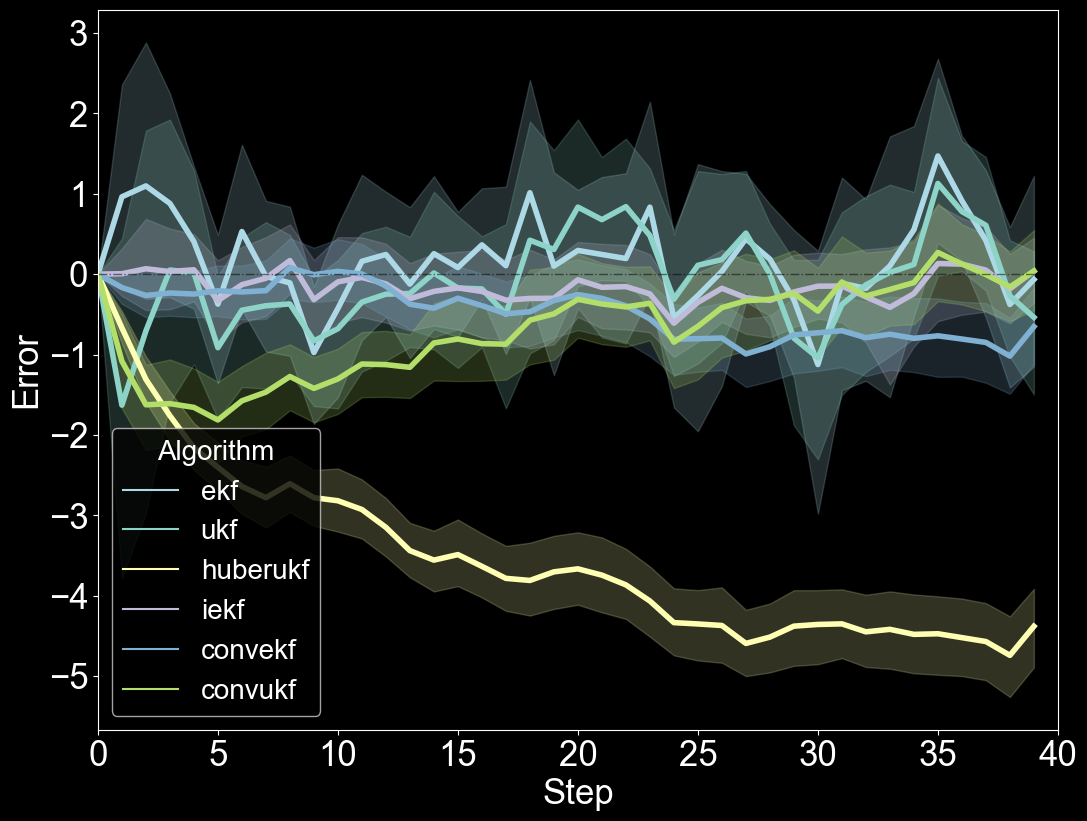

In [14]:
axes_pos = [0.2, 0.2, 0.6, 0.6]
BETA = [0.0001]
palette = sns.color_palette(colors)
font = 25
legend_elements = [Patch(facecolor=colors[i], label=label[i]) for i in range(len(label))]
f1 = plt.figure(figsize=(16, 12), dpi=100)
ax1 = f1.add_axes(axes_pos)
g1 = sns.lineplot(x='Step', y="Error", hue="Algorithm", style="Algorithm" , data=pd_error1,
                    palette=palette, linewidth=4, dashes=False)
ax1.set_ylabel('Error', fontsize=font)
ax1.set_xlabel("Step", fontsize=font)
plt.xlim(0, time_length)
# plt.ylim(-1, 3)
plt.axhline(0, ls='-.', c='k', lw=1, alpha=0.5)
# ax1.set_xticks(4 * np.arange(6))
# ax1.set_xticklabels(('0', '4', '8', '12', '16', '20'), fontsize=font)
handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles=handles, labels=labels, fontsize=font)
# ax1.legend(legend_elements)
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)

In [15]:
# plot data_files['ekf_s']['y_mc'][0, :]
# name = ['ekf_m', 'ukf_m', 'huberukf_m', 'iekf_m', 'convekf0.1_m', 'convukf0.05_m']
# label = ['measurement', 'ekf', 'ukf', 'huberukf', 'iekf', 'convekf', 'convukf']
# colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
# legend_elements = [Patch(facecolor=colors[i], label=label[i]) for i in range(len(label))]


# plt.figure(figsize=(10, 6))
# plt.plot(data_files['ekf_m']['y_mc'][0][start_step:,0], label='obs', linewidth=3)
# for i in range(len(name)):
#     plt.plot(get_error(name[i]), label=label[i], linewidth=2)
# plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='y=0 line')
# plt.legend(handles=legend_elements)


# # Create a twin Axes sharing the xaxis
# fig, ax1 = plt.subplots(figsize=(20, 16))
# ax2 = ax1.twinx()
# # color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('measurement', color=color)
# ax1.plot(data_files['ekf_m']['y_mc'][0][start_step:], label='obs', color=color, linewidth=3)
# ax1.tick_params(axis='y', labelcolor=color) 
# color = 'tab:blue'
# ax2.set_ylabel('error', color=color)  
# for i in range(len(name)):
#     ax2.plot(get_error(name[i]), label=label[i], linewidth=2)
# ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='y=0 line')
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  
# plt.legend(handles=legend_elements)
# plt.show()